In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import glob

In [2]:
from pydub import AudioSegment
audio_m4a = AudioSegment.from_file('Speech.m4a')
sampling_freq, audio = wavfile.read('speech.wav')

In [3]:
audio_m4a

In [4]:
audio

array([[ 6,  6],
       [ 7,  7],
       [ 5,  5],
       ...,
       [-3, -3],
       [-4, -4],
       [-4, -4]], dtype=int16)

In [5]:
# Print the params
print ('\nShape:', audio.shape)
print ('Datatype:', audio.dtype)
print ('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')


Shape: (808896, 2)
Datatype: int16
Duration: 18.342 seconds


In [6]:
# Normalize the values
audio = audio / (2**15)

In [7]:
audio.shape

(808896, 2)

In [8]:
# Extract first 30 values for plotting
audio = audio[:300]

In [9]:
# Build the time axis
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)

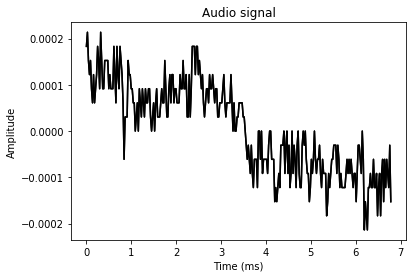

In [10]:
# Convert to seconds
x_values *= 1000

# Plotting the chopped audio signal
plt.plot(x_values, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

In [11]:
def detect_leading_silence(sound, silence_threshold=-20.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms

    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0 # ms
    sig_len = len(sound)
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold:
        trim_ms += chunk_size
        if trim_ms > sig_len:
            trim_ms = 0
            break
    return trim_ms

In [12]:
def trim_sound(sound):
    duration = len(sound)
    start_trim = detect_leading_silence(sound)
    end_trim = duration - detect_leading_silence(sound.reverse())

    trimmed_sound = sound[start_trim:end_trim]
    if len(trimmed_sound) < 300:
        start_trim -= 200
        start_trim = max(start_trim, 0)
        end_trim += 200
        trimmed_sound = sound[start_trim:end_trim]
    return trimmed_sound

In [13]:
folders = ['zero']

In [14]:
def strim_data():
    for folder in folders:
        src_path = path = '../Data/data_processed_part2/' + folder + '/*'
        print (src_path)
        for wave_file in glob.glob(src_path):
            file_name = os.path.basename(wave_file)
            print (file_name)
            dest_path = '../Data/data_processed_part2_trimmed/' + folder + '/' + file_name
            try:
                sound = AudioSegment.from_file(wave_file, format='wav')
            except:
                pass
            trimmed_sound = trim_sound(sound)
            trimmed_sound.export(dest_path, format = 'wav')

In [15]:
strim_data

<function __main__.strim_data()>

In [16]:
# for folder in folders:
#     src_path = path = '../Data/data_processed_part2/' + folder + '/*'
#     print (src_path)
#     for wave_file in glob.glob(src_path):
#         print(wave_file)

# Squashing all the previous work, not working 

In [17]:
from pydub import AudioSegment

def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms

    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

sound = AudioSegment.from_file("Speech.wav", format="wav")
print(sound)
start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim]

In [18]:
print("trimmed length is {}".format(duration - len(trimmed_sound)))
duration, len(trimmed_sound)

trimmed length is 5960


(18342, 12382)

In [19]:
print(sound.duration_seconds)
trimmed_sound.duration_seconds

18.342312925170067


12.381995464852608

In [20]:
trimmed_sound.export("trimmed.wav", format="wav")

<_io.BufferedRandom name='trimmed.wav'>